In [1]:
import sys
sys.path.append('../lib')
from simulations import simulate_diffusing_harmonic
import matplotlib.pyplot as plt
import numpy as np
from MBR_calculation import analytical_mean_back_realxation, mean_back_realxation, mean_back_relaxation_multiple_trajectories

In [2]:
T_simulation = 10000
dt = 0.01
k = 1
d_particle = 1
d_oscilator = .3
x,_ = simulate_diffusing_harmonic(T_simulation, dt, k, d_particle, d_oscilator)

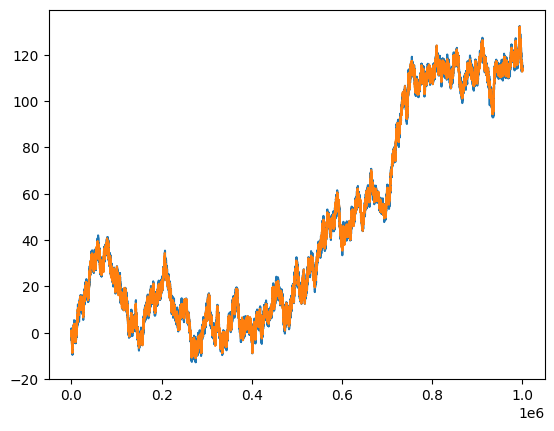

In [3]:
plt.plot(x)
plt.plot(_)

In [4]:
T_MBR = 10
t_MBR = np.linspace(0, T_MBR, int(T_MBR/dt))
analytical_MBR = analytical_mean_back_realxation(dt,T_MBR, k, d_particle, d_oscilator)

In [5]:
Tau = dt
multiplier = 1
simulation_MBR = mean_back_realxation(dt,x, Tau, T_MBR, multiplier=multiplier)

100%|██████████| 312910/312910 [00:01<00:00, 228212.31it/s]


In [19]:
N_seperate_trajectoris = 12
trajectories = [simulate_diffusing_harmonic(T_simulation/N_seperate_trajectoris, dt, k, d_particle, d_oscilator)[0] for _ in range(N_seperate_trajectoris)]

In [20]:
combined_mbr = mean_back_relaxation_multiple_trajectories(dt, trajectories,Tau, T_MBR, multiplier=multiplier)

100%|██████████| 12/12 [00:06<00:00,  1.75it/s]


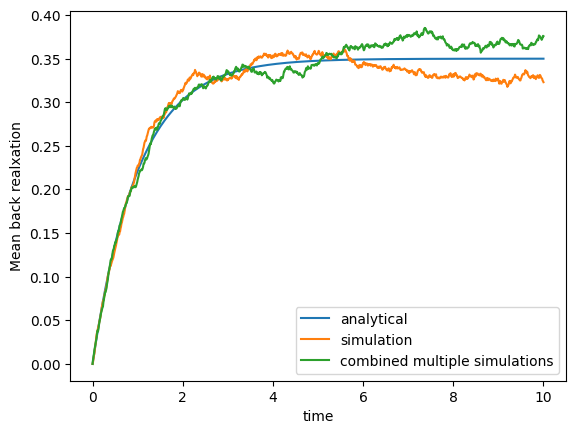

In [22]:
plt.plot(t_MBR,analytical_MBR, label='analytical')
plt.plot(t_MBR,simulation_MBR, label='simulation')
plt.plot(t_MBR,combined_mbr, label='combined multiple simulations')
plt.xlabel('time')
plt.ylabel('Mean back realxation')
plt.legend()
plt.show()